In [1]:
import epygram
import os
import sys

# Define the path to the specific FA file
file_directory = "/home/dev/ALARO/workdir/pf20130101/"
file_name = "pfABOFABOF+0004"
file_path = os.path.join(file_directory, file_name)

# Variable to hold the epygram resource
resource = None

try:
    # Check if the file exists before trying to open
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}", file=sys.stderr)
        exit(1)

    print(f"Attempting to open file: {file_path}")
    # Open the FA file in read mode ('r')
    # You might need to specify the format if epygram doesn't auto-detect FA
    # e.g., resource = epygram.formats.resource(file_path, 'r', fmt='FA')
    resource = epygram.formats.resource(file_path, 'r')
    print(f"Successfully opened resource: {resource}")

    # List all available fields in the file
    print("\n--- Available Fields ---")
    available_fields = resource.listfields()
    if not available_fields:
        print("No fields found in the file.")
    else:
        print(f"Found {len(available_fields)} fields:")
        # Print first few fields for brevity, or all if not too many
        max_fields_to_print = 20
        for i, field_name in enumerate(available_fields):
            print(f"- {field_name}")
            if i >= max_fields_to_print - 1 and len(available_fields) > max_fields_to_print:
                print(f"... and {len(available_fields) - max_fields_to_print} more.")
                break

        # --- Example: Read data for one field ---
        # Let's try to read the first field from the list
        example_field_name = available_fields[0]
        print(f"\n--- Reading Example Field: {example_field_name} ---")
        try:
            # Read the specific field
            field_data = resource.readfield(example_field_name)

            # Print information about the field
            # epygram field objects often have a useful __str__ representation
            print("Field Object Info:")
            print(field_data)

            # Access and print the actual data array's shape
            numpy_data = field_data.getdata()
            print(f"\nData Array Shape: {numpy_data.shape}")
            # Optionally print min/max values or other stats
            # print(f"Min Value: {numpy_data.min()}")
            # print(f"Max Value: {numpy_data.max()}")

            # Print field attributes (metadata)
            print("\nField Attributes:")
            # Ensure attributes is iterable and not None
            attributes = field_data.attributes
            if attributes:
                 for key, value in attributes.items():
                      print(f"- {key}: {value}")
            else:
                 print("No attributes found for this field.")


        except Exception as read_error:
            print(f"Error reading field '{example_field_name}': {read_error}", file=sys.stderr)

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}", file=sys.stderr)
except ImportError:
    print("Error: epygram library not found. Please install it.", file=sys.stderr)
except Exception as e:
    # Catch other potential epygram errors (e.g., format issues, read errors)
    print(f"An error occurred: {e}", file=sys.stderr)
finally:
    # --- IMPORTANT: Close the resource ---
    # Always ensure the resource is closed after use
    if resource is not None:
        try:
            resource.close()
            print("\nResource closed.")
        except Exception as close_error:
            print(f"Error closing resource: {close_error}", file=sys.stderr)

# [2025/05/04-18:47:22][epygram.formats][<module>:0072][INFO]: Format: HDF5SAF is deactivated at runtime (Error: No module named 'h5py'). Please deactivate from config.implemented_formats or fix error.
# [2025/05/04-18:47:22][epygram][prompt:0100][INFO]: Plugin 'with_cartopy' from config.activate_plugins is not available.


Attempting to open file: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
Successfully opened resource: FA containing:
    isopen: True
    openmode: r
    format: FA
    filename: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
    fmtdelayedopen: False
    headername: a8c9d8fd02fc48c2
    validity: [<epygram.base.FieldValidity object at 0x735c1c3ea7a0>, ... (1 objects)]
    default_compression: __unknown__
    cdiden: FULLPOS                                                                         
    processtype: forecast
    container: File containing:
        filename: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
        _abspath: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
    fieldscompression: 
    _cache_find_re_in_list: 
    _unit: -1000
    empty: False
    reference_pressure: 101325.0
    geometry: ProjectedGeometry containing:
        name: mercator
        projection: 
            reference_lat: Angle containing:
                _radians: 0.0
           

Error reading field 'SURFIND.TERREMER': 'H2DField' object has no attribute 'attributes'


In [2]:
import epygram
import os
import sys

file_directory = "/home/dev/ALARO/workdir/pf20130101/"
file_name = "pfABOFABOF+0004"
file_path = os.path.join(file_directory, file_name)

resource = None
try:
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}", file=sys.stderr)
        exit(1)

    print(f"Opening file to list all fields: {file_path}")
    resource = epygram.formats.resource(file_path, 'r')
    print(f"Resource opened.")

    print("\n--- All Available Fields in {file_name} ---")
    available_fields = resource.listfields()

    if not available_fields:
        print("No fields found in the file.")
    else:
        print(f"Found {len(available_fields)} fields:")
        for field_name in available_fields:
            print(f"- {field_name}") # Print every field name

except Exception as e:
    print(f"An error occurred: {e}", file=sys.stderr)
finally:
    if resource is not None:
        try:
            resource.close()
            print("\nResource closed.")
        except Exception as close_error:
            print(f"Error closing resource: {close_error}", file=sys.stderr)

Opening file to list all fields: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
Resource opened.

--- All Available Fields in {file_name} ---
Found 2908 fields:
- SURFIND.TERREMER
- SURFTEMPERATURE
- SURFRESERV.NEIGE
- SURFGEOPOTEN
- SURFPROP.VEGETAT
- PROFRESERV.EAU
- SURFVAR.GEOP.DIR
- SURFPROP.ARGILE
- PROFRESERV.GLACE
- SURFZ0.FOIS.G
- SURFRESI.STO.MIN
- SURFAEROS.SOOT
- SURFALBEDO.VEG
- SURFEMISSIVITE
- SURFRES.EVAPOTRA
- SURFVAR.GEOP.ANI
- SURFALBEDO
- SURFIND.FOLIAIRE
- SURFPROP.SABLE
- SURFGZ0.THERM
- SURFIND.VEG.DOMI
- SURFAEROS.SEA
- SURFEPAIS.SOL
- SURFALBEDO.SOLNU
- SURFAEROS.DESERT
- SURFET.GEOPOTENT
- SURFAEROS.LAND
- PROFTEMPERATURE
- SURFPREC.EAU.GEC
- SURFPREC.EAU.CON
- SURFPREC.NEI.GEC
- SURFPREC.NEI.CON
- SURFPREC.GRA.GEC
- SURFRF.SHORT.DO
- SURFRF.LONG.DO
- SURFFLU.RAY.SOLA
- SURFFLU.RAY.THER
- SURFFLU.LAT.MEVA
- SURFFLU.LAT.TOTA
- SURFFLU.CHA.SENS
- SURFFLU.MEVAP.EA
- SURFFLU.MSUBL.NE
- SURFTENS.TURB.ME
- SOMMFLU.RAY.SOLA
- SOMMFLU.RAY.THER
- SURFTENS.TURB.ZO
-

In [3]:
import epygram
import os
import sys
import numpy as np

# Define the path to the specific FA file and the field to inspect
file_directory = "/home/dev/ALARO/workdir/pf20130101/"
file_name = "pfABOFABOF+0004"
field_name_to_inspect = "SURFTEMPERATURE"
file_path = os.path.join(file_directory, file_name)

# Variable to hold the epygram resource
resource = None

try:
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}", file=sys.stderr)
        exit(1)

    print(f"Attempting to open file: {file_path}")
    resource = epygram.formats.resource(file_path, 'r')
    print(f"Successfully opened resource.")

    print(f"\n--- Inspecting Field: {field_name_to_inspect} ---")
    try:
        # Read the specific field
        field = resource.readfield(field_name_to_inspect)

        # 1. Print the field object's default representation (often informative)
        print("\nField Object Info:")
        print(field)

        # 2. Get the actual data as a NumPy array
        data = field.getdata()

        # 3. Print Data Details
        print("\nData Details:")
        print(f"- Data Type (dtype): {data.dtype}")
        print(f"- Data Shape: {data.shape}")

        # 4. Print Basic Statistics (ignore NaNs if any)
        print("\nBasic Statistics:")
        if np.isnan(data).any():
             print(f"- Minimum Value (non-NaN): {np.nanmin(data):.2f}")
             print(f"- Maximum Value (non-NaN): {np.nanmax(data):.2f}")
             print(f"- Mean Value (non-NaN):    {np.nanmean(data):.2f}")
        else:
             print(f"- Minimum Value: {np.min(data):.2f}")
             print(f"- Maximum Value: {np.max(data):.2f}")
             print(f"- Mean Value:    {np.mean(data):.2f}")

        # 5. Attempt to get specific metadata (like units)
        # Accessing metadata can be tricky; we'll try a few common ways.
        # The 'print(field)' output might show where units are stored.
        print("\nMetadata (Attempting to find units):")
        units = "Unknown"
        # Try accessing common attributes or using get() method
        if hasattr(field, 'units') and field.units:
            units = field.units
        elif hasattr(field, 'get'):
             # Try common keys used in GRIB/FA metadata via get()
             units = field.get('units', 'Unknown')
             if units == 'Unknown': # Maybe another common name?
                 units = field.get('parameterUnits', 'Unknown')

        # Check the 'generic' fid part seen in the previous output
        if units == 'Unknown' and hasattr(field, 'fid') and hasattr(field.fid, 'generic'):
             # Example - This path might be different
             if isinstance(field.fid.generic, dict) and 'parameterUnits' in field.fid.generic:
                 units = field.fid.generic['parameterUnits']

        print(f"- Units: {units}")
        # You can add more metadata checks here based on the 'print(field)' output

    except epygram.errors.epygramError as field_error:
        # Catch specific epygram error if field not found
        print(f"Error: Field '{field_name_to_inspect}' not found or could not be read.", file=sys.stderr)
        print(f"Details: {field_error}", file=sys.stderr)
    except AttributeError as ae:
        print(f"Error accessing attribute: {ae}. Metadata structure might differ.", file=sys.stderr)
    except Exception as read_error:
        print(f"Error reading or processing field '{field_name_to_inspect}': {read_error}", file=sys.stderr)


except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}", file=sys.stderr)
except ImportError:
    print("Error: epygram or numpy library not found. Please install them.", file=sys.stderr)
except Exception as e:
    print(f"An error occurred: {e}", file=sys.stderr)
finally:
    # --- IMPORTANT: Close the resource ---
    if resource is not None:
        try:
            resource.close()
            print("\nResource closed.")
        except Exception as close_error:
            print(f"Error closing resource: {close_error}", file=sys.stderr)

Attempting to open file: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
Successfully opened resource.

--- Inspecting Field: SURFTEMPERATURE ---

Field Object Info:
H2DField containing:
    fid: 
        FA: SURFTEMPERATURE
        generic: 
            discipline: 0
            parameterCategory: 0
            parameterNumber: 0
            productDefinitionTemplateNumber: 0
            scaledValueOfFirstFixedSurface: 0
            tablesVersion: 15
            typeOfFirstFixedSurface: 1
    comment: __unknown__
    misc_metadata: 
    units: 
    structure: H2D
    geometry: ProjectedGeometry containing:
        name: mercator
        projection: 
            reference_lat: Angle containing:
                _radians: 0.0
                _origin_unit: radians
                _origin_value: 0.0
            reference_lon: Angle containing:
                _radians: -1.0471975511965974
                _origin_unit: radians
                _origin_value: 5.235987755982989
            

Attempting to open file: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
Successfully opened resource.

--- Inspecting Field: SURFTEMPERATURE ---

Data Details:
- Data Type (dtype): float64
- Data Shape: (480, 480)

Basic Statistics:
- Min/Max/Mean: 283.58 / 306.47 / 296.27
- Units: Unknown

Generating plot...


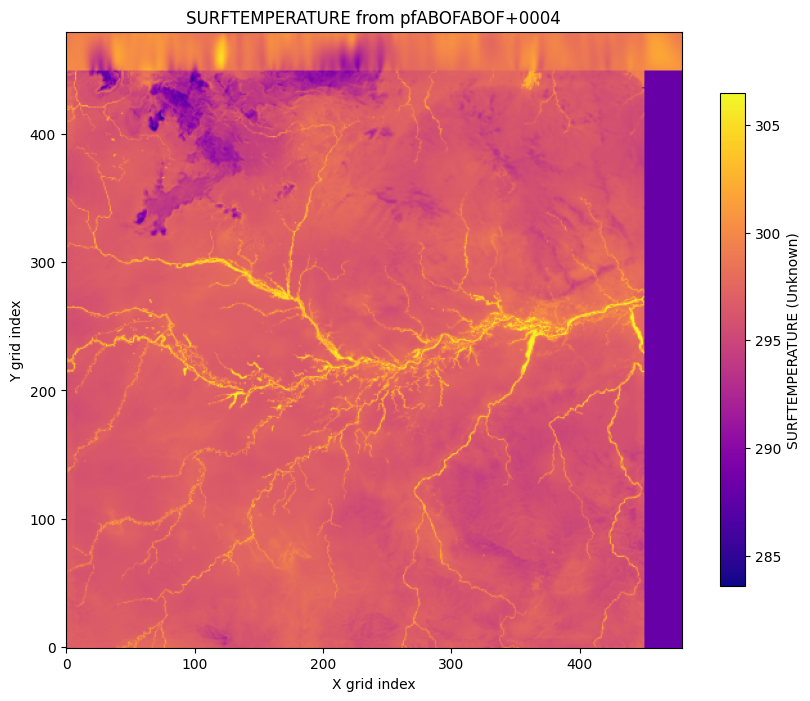

Plot window displayed. Close the plot window to continue/exit.

Resource closed.


In [4]:
import epygram
import os
import sys
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib

# Define the path to the specific FA file and the field to inspect
file_directory = "/home/dev/ALARO/workdir/pf20130101/"
file_name = "pfABOFABOF+0004"
field_name_to_inspect = "SURFTEMPERATURE"
file_path = os.path.join(file_directory, file_name)

# Variable to hold the epygram resource
resource = None

try:
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}", file=sys.stderr)
        exit(1)

    print(f"Attempting to open file: {file_path}")
    resource = epygram.formats.resource(file_path, 'r')
    print(f"Successfully opened resource.")

    print(f"\n--- Inspecting Field: {field_name_to_inspect} ---")
    try:
        # Read the specific field
        field = resource.readfield(field_name_to_inspect)

        # 1. Print the field object's default representation (optional now)
        # print("\nField Object Info:")
        # print(field)

        # 2. Get the actual data as a NumPy array
        data = field.getdata()

        # 3. Print Data Details (optional now)
        print("\nData Details:")
        print(f"- Data Type (dtype): {data.dtype}")
        print(f"- Data Shape: {data.shape}")

        # 4. Print Basic Statistics (optional now, but good for context)
        print("\nBasic Statistics:")
        if np.isnan(data).any():
             min_val, max_val, mean_val = np.nanmin(data), np.nanmax(data), np.nanmean(data)
        else:
             min_val, max_val, mean_val = np.min(data), np.max(data), np.mean(data)
        print(f"- Min/Max/Mean: {min_val:.2f} / {max_val:.2f} / {mean_val:.2f}")


        # 5. Attempt to get units for plot label
        units = "Unknown"
        if hasattr(field, 'units') and field.units:
            units = field.units
        elif hasattr(field, 'get'):
             units = field.get('units', 'Unknown')
             if units == 'Unknown':
                 units = field.get('parameterUnits', 'Unknown')
        print(f"- Units: {units}")

        # --- Plotting the Data ---
        print("\nGenerating plot...")
        fig, ax = plt.subplots(figsize=(10, 8)) # Adjust figure size if needed

        # Use imshow for a quick heatmap visualization
        # Choose a colormap (e.g., 'viridis', 'plasma', 'coolwarm', 'jet')
        # 'origin=lower' places the [0,0] index at the bottom-left
        im = ax.imshow(data, cmap='plasma', origin='lower')

        # Add a colorbar
        cbar = fig.colorbar(im, ax=ax, shrink=0.8) # shrink makes colorbar slightly smaller
        cbar.set_label(f'{field_name_to_inspect} ({units})')

        # Add title and labels
        ax.set_title(f'{field_name_to_inspect} from {file_name}')
        ax.set_xlabel("X grid index")
        ax.set_ylabel("Y grid index")

        # Show the plot on screen
        plt.show()
        print("Plot window displayed. Close the plot window to continue/exit.")
        # -------------------------

    except epygram.errors.epygramError as field_error:
        print(f"Error: Field '{field_name_to_inspect}' not found or could not be read.", file=sys.stderr)
        print(f"Details: {field_error}", file=sys.stderr)
    except AttributeError as ae:
        print(f"Error accessing attribute: {ae}. Metadata structure might differ.", file=sys.stderr)
    except Exception as read_error:
        print(f"Error reading or processing field '{field_name_to_inspect}': {read_error}", file=sys.stderr)


except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}", file=sys.stderr)
except ImportError as imp_err:
    print(f"Import Error: {imp_err}. Make sure epygram, numpy, and matplotlib are installed.", file=sys.stderr)
except Exception as e:
    print(f"An error occurred: {e}", file=sys.stderr)
finally:
    # --- IMPORTANT: Close the resource ---
    if resource is not None:
        try:
            resource.close()
            print("\nResource closed.")
        except Exception as close_error:
            print(f"Error closing resource: {close_error}", file=sys.stderr)

In [5]:
import epygram
import os
import sys
import numpy as np # Though not strictly needed for metadata, good practice

# Define the path to the specific FA file and the field to inspect
file_directory = "/home/dev/ALARO/workdir/pf20130101/"
file_name = "pfABOFABOF+0004"
field_name_to_inspect = "SURFTEMPERATURE"
file_path = os.path.join(file_directory, file_name)

# Variable to hold the epygram resource
resource = None

try:
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}", file=sys.stderr)
        exit(1)

    print(f"Attempting to open file: {file_path}")
    resource = epygram.formats.resource(file_path, 'r')
    print(f"Successfully opened resource.")

    print(f"\n--- Inspecting Attributes/Metadata for Field: {field_name_to_inspect} ---")
    try:
        # Read the specific field
        field = resource.readfield(field_name_to_inspect)

        # Method 1: Default String Representation (Often includes key info)
        print("\n>>> Method 1: Default print(field) output <<<")
        print(field)
        print("-" * 50)

        # Method 2: Inspect the 'fid' (Field Identifier) attribute
        print("\n>>> Method 2: Inspecting field.fid <<<")
        if hasattr(field, 'fid'):
            print(f"field.fid type: {type(field.fid)}")
            if hasattr(field.fid, 'FA'):
                print(f"  field.fid.FA: {field.fid.FA}")
            if hasattr(field.fid, 'generic'):
                print(f"  field.fid.generic: {field.fid.generic}")
                # If generic looks like a dictionary, print its items
                if isinstance(field.fid.generic, dict):
                     print("  Items in field.fid.generic:")
                     for key, value in field.fid.generic.items():
                         print(f"    - {key}: {value}")
            # Print the whole fid object representation as well
            print(f"  Complete field.fid: {field.fid}")
        else:
            print("Field object does not have 'fid' attribute.")
        print("-" * 50)

        # Method 3: Try common metadata keys using field.get()
        print("\n>>> Method 3: Using field.get() for common keys <<<")
        if hasattr(field, 'get'):
            common_keys = ['units', 'name', 'long_name', 'standard_name',
                           'parameterCategory', 'parameterNumber',
                           'levelType', 'level', 'typeOfLevel']
            for key in common_keys:
                value = field.get(key, '--- Key Not Found ---')
                print(f"  field.get('{key}') => {value}")
        else:
            print("Field object does not support .get() method.")
        print("-" * 50)

        # Method 4: Use dir() to list all attributes and methods (includes internal ones)
        print("\n>>> Method 4: Using dir(field) - includes internal details <<<")
        # We can filter out private/special methods for slightly cleaner output
        field_dir = [item for item in dir(field) if not item.startswith('_')]
        print(field_dir)
        print("-" * 50)

    except epygram.errors.epygramError as field_error:
        print(f"Error: Field '{field_name_to_inspect}' not found or could not be read.", file=sys.stderr)
        print(f"Details: {field_error}", file=sys.stderr)
    except Exception as read_error:
        print(f"Error processing field '{field_name_to_inspect}': {read_error}", file=sys.stderr)


except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}", file=sys.stderr)
except ImportError as imp_err:
    print(f"Import Error: {imp_err}. Make sure epygram and numpy are installed.", file=sys.stderr)
except Exception as e:
    print(f"An error occurred: {e}", file=sys.stderr)
finally:
    # --- IMPORTANT: Close the resource ---
    if resource is not None:
        try:
            resource.close()
            print("\nResource closed.")
        except Exception as close_error:
            print(f"Error closing resource: {close_error}", file=sys.stderr)

Attempting to open file: /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004
Successfully opened resource.

--- Inspecting Attributes/Metadata for Field: SURFTEMPERATURE ---

>>> Method 1: Default print(field) output <<<
H2DField containing:
    fid: 
        FA: SURFTEMPERATURE
        generic: 
            discipline: 0
            parameterCategory: 0
            parameterNumber: 0
            productDefinitionTemplateNumber: 0
            scaledValueOfFirstFixedSurface: 0
            tablesVersion: 15
            typeOfFirstFixedSurface: 1
    comment: __unknown__
    misc_metadata: 
    units: 
    structure: H2D
    geometry: ProjectedGeometry containing:
        name: mercator
        projection: 
            reference_lat: Angle containing:
                _radians: 0.0
                _origin_unit: radians
                _origin_value: 0.0
            reference_lon: Angle containing:
                _radians: -1.0471975511965974
                _origin_unit: radians
          

Opening /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004...
Reading field: SURFTEMPERATURE...
Retrieving full coordinates and geometry metadata...
Determining slicing indices for Computational Zone (C-Zone)...
Full dims: (480, 480), C-Zone dims: (434, 434)
Calculated slice - Y: [23:457], X: [23:457]
Inner data shape after C-Zone slicing: (434, 434)
Creating xarray.DataArray for C-Zone domain...
<xarray.DataArray 'SURFTEMPERATURE_czone' (y_c: 434, x_c: 434)> Size: 2MB
array([[296.53608413, 296.71939048, 296.61115245, ..., 287.99994422,
        287.99994422, 287.99994422],
       [296.61918301, 296.80458428, 296.70263104, ..., 287.99994422,
        287.99994422, 287.99994422],
       [296.8091233 , 296.86044907, 296.61289822, ..., 287.99994422,
        287.99994422, 287.99994422],
       ...,
       [295.12130833, 294.75085494, 293.55360266, ..., 300.78669635,
        300.90994804, 301.01609114],
       [294.83988945, 294.49073451, 293.51344984, ..., 300.88096818,
        301.01888438,

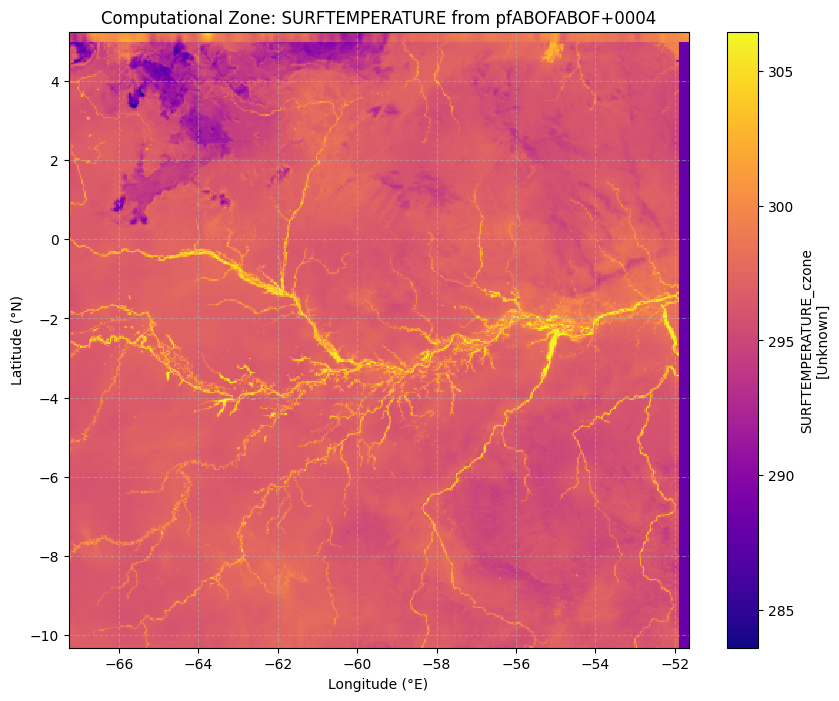

Plot window displayed. Close the plot window to continue/exit.

Resource closed.


In [12]:
import epygram
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# --- Configuration ---
file_directory = "/home/dev/ALARO/workdir/pf20130101/"
file_name = "pfABOFABOF+0004"
field_name_to_plot = "SURFTEMPERATURE"
file_path = os.path.join(file_directory, file_name)
# ---

resource = None
try:
    # --- Read Data and Coordinates using epygram ---
    print(f"Opening {file_path}...")
    resource = epygram.formats.resource(file_path, 'r')

    print(f"Reading field: {field_name_to_plot}...")
    field = resource.readfield(field_name_to_plot)
    data_full = field.getdata() # The FULL 2D temperature data

    print("Retrieving full coordinates and geometry metadata...")
    if not (hasattr(field, 'geometry') and
            hasattr(field.geometry, 'get_lonlat_grid') and
            hasattr(field.geometry, 'dimensions') and
            isinstance(field.geometry.dimensions, dict)):
        print("Error: Cannot find necessary geometry methods or dimensions dict.", file=sys.stderr)
        sys.exit(1)

    lons_full, lats_full = field.geometry.get_lonlat_grid() # Get FULL 2D lon/lat arrays
    geometry_dims = field.geometry.dimensions

    # --- Automatically Determine Slicing based on C-Zone ---
    print("Determining slicing indices for Computational Zone (C-Zone)...")
    required_keys = ['X', 'Y', 'X_Czone', 'Y_Czone']
    if not all(key in geometry_dims for key in required_keys):
        print(f"Error: Missing one or more required dimension keys in geometry: {required_keys}", file=sys.stderr)
        print(f"Available keys: {list(geometry_dims.keys())}")
        sys.exit(1)

    nx_full = geometry_dims['X']
    ny_full = geometry_dims['Y']
    nx_Czone = geometry_dims['X_Czone']
    ny_Czone = geometry_dims['Y_Czone']

    # Calculate offsets to center the C-zone within the full grid
    x_offset = (nx_full - nx_Czone) // 2
    y_offset = (ny_full - ny_Czone) // 2

    # Calculate end indices for slicing
    x_end = x_offset + nx_Czone
    y_end = y_offset + ny_Czone

    print(f"Full dims: ({ny_full}, {nx_full}), C-Zone dims: ({ny_Czone}, {nx_Czone})")
    print(f"Calculated slice - Y: [{y_offset}:{y_end}], X: [{x_offset}:{x_end}]")

    # --- Apply Slicing ---
    inner_data = data_full[y_offset:y_end, x_offset:x_end]
    inner_lats = lats_full[y_offset:y_end, x_offset:x_end]
    inner_lons = lons_full[y_offset:y_end, x_offset:x_end]

    print(f"Inner data shape after C-Zone slicing: {inner_data.shape}") # Should be (434, 434) based on metadata

    # Attempt to get units
    units = "Unknown"
    if hasattr(field, 'units') and field.units:
        units = field.units
    # Add other methods to find units if needed, based on inspection results

    # --- Structure SLICED (C-Zone) data with xarray ---
    print("Creating xarray.DataArray for C-Zone domain...")
    dims_inner = ('y_c', 'x_c') # Dimension names for C-zone

    da_czone = xr.DataArray(
        inner_data,
        coords={
            'latitude': (dims_inner, inner_lats),
            'longitude': (dims_inner, inner_lons),
            'y_c': np.arange(inner_data.shape[0]),
            'x_c': np.arange(inner_data.shape[1]),
        },
        dims=dims_inner,
        name=field_name_to_plot + "_czone", # Indicate C-zone
        attrs={'units': units}
    )
    print(da_czone)

    # --- Plotting C-Zone data with xarray ---
    print("\nGenerating plot for C-Zone domain...")
    da_czone.plot(x='longitude', y='latitude', cmap='plasma', figsize=(10, 8))

    plt.title(f"Computational Zone: {field_name_to_plot} from {file_name}")
    plt.xlabel("Longitude (°E)")
    plt.ylabel("Latitude (°N)")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Display the plot
    plt.show()
    print("Plot window displayed. Close the plot window to continue/exit.")

except epygram.errors.epygramError as field_error:
    print(f"epygram Error: Could not read field or coordinates.", file=sys.stderr)
    print(f"Details: {field_error}", file=sys.stderr)
except KeyError as key_err:
     print(f"Metadata Error: Missing expected key in geometry dimensions: {key_err}", file=sys.stderr)
except ImportError as imp_err:
    print(f"Import Error: {imp_err}. Make sure epygram, numpy, xarray, and matplotlib are installed.", file=sys.stderr)
except Exception as e:
    print(f"An unexpected error occurred: {e}", file=sys.stderr)
    # Optional: uncomment below for full traceback during debugging
    # import traceback
    # traceback.print_exc()
finally:
    # --- IMPORTANT: Close the epygram resource ---
    if resource is not None:
        try:
            resource.close()
            print("\nResource closed.")
        except Exception as close_error:
            print(f"Error closing resource: {close_error}", file=sys.stderr)

Opening /home/dev/ALARO/workdir/pf20130101/pfABOFABOF+0004...
Reading field: SURFTEMPERATURE...
Retrieving full coordinates...
Full data shape: (480, 480)
Creating xarray.DataArray for the full domain...
Applying geographic mask: Lat [-10.0, 4.5], Lon [-67.0, -52.0]
Mask applied. Points outside the bounds are now NaN.

Generating plot for geographically masked data...


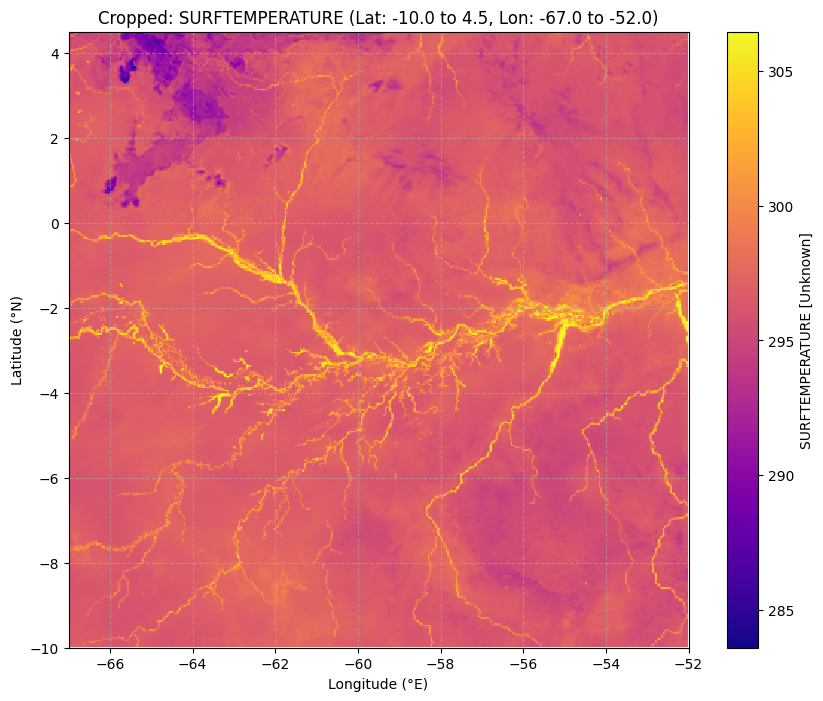

Plot window displayed. Close the plot window to continue/exit.

Resource closed.


In [14]:
import epygram
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# --- Configuration ---
file_directory = "/home/dev/ALARO/workdir/pf20130101/"
file_name = "pfABOFABOF+0004"
field_name_to_plot = "SURFTEMPERATURE"
file_path = os.path.join(file_directory, file_name)

# Define the desired geographic cropping boundaries
lat_min = -10.0
lat_max = 4.5
lon_min = -67.0
lon_max = -52.0
# ---

resource = None
try:
    # --- Read Data and Coordinates using epygram ---
    print(f"Opening {file_path}...")
    resource = epygram.formats.resource(file_path, 'r')

    print(f"Reading field: {field_name_to_plot}...")
    field = resource.readfield(field_name_to_plot)
    data_full = field.getdata() # The FULL 2D temperature data

    print("Retrieving full coordinates...")
    if not (hasattr(field, 'geometry') and hasattr(field.geometry, 'get_lonlat_grid')):
        print("Error: Cannot find method to get lat/lon grid from field geometry.", file=sys.stderr)
        sys.exit(1)

    lons_full, lats_full = field.geometry.get_lonlat_grid() # Get FULL 2D lon/lat arrays
    print(f"Full data shape: {data_full.shape}")

    # Attempt to get units
    units = "Unknown"
    if hasattr(field, 'units') and field.units:
        units = field.units
    # Add other methods to find units if needed

    # --- Structure FULL data with xarray ---
    print("Creating xarray.DataArray for the full domain...")
    dims = ('y', 'x') # Dimension names for full grid

    da_full = xr.DataArray(
        data_full,
        coords={
            'latitude': (dims, lats_full),
            'longitude': (dims, lons_full),
            'y': np.arange(data_full.shape[0]),
            'x': np.arange(data_full.shape[1]),
        },
        dims=dims,
        name=field_name_to_plot,
        attrs={'units': units}
    )

    # --- Apply Geographic Mask using .where() ---
    print(f"Applying geographic mask: Lat [{lat_min}, {lat_max}], Lon [{lon_min}, {lon_max}]")
    # Keep data *where* the condition is True, otherwise fill with NaN
    # Do NOT use drop=True here, as we want to plot the result on the original grid structure
    da_masked = da_full.where(
        (da_full.latitude >= lat_min) & (da_full.latitude <= lat_max) &
        (da_full.longitude >= lon_min) & (da_full.longitude <= lon_max)
    )
    print("Mask applied. Points outside the bounds are now NaN.")

    # --- Plotting the MASKED data ---
    print("\nGenerating plot for geographically masked data...")
    # Plotting the array with NaNs - NaNs should not be colored
    da_masked.plot(x='longitude', y='latitude', cmap='plasma', figsize=(10, 8))

    # Set plot limits explicitly to the requested bounds for clarity
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)

    plt.title(f"Cropped: {field_name_to_plot} (Lat: {lat_min} to {lat_max}, Lon: {lon_min} to {lon_max})")
    plt.xlabel("Longitude (°E)")
    plt.ylabel("Latitude (°N)")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Display the plot
    plt.show()
    print("Plot window displayed. Close the plot window to continue/exit.")

except epygram.errors.epygramError as field_error:
    print(f"epygram Error: Could not read field or coordinates.", file=sys.stderr)
    print(f"Details: {field_error}", file=sys.stderr)
except ImportError as imp_err:
    print(f"Import Error: {imp_err}. Make sure epygram, numpy, xarray, and matplotlib are installed.", file=sys.stderr)
except Exception as e:
    print(f"An unexpected error occurred: {e}", file=sys.stderr)
finally:
    # --- IMPORTANT: Close the epygram resource ---
    if resource is not None:
        try:
            resource.close()
            print("\nResource closed.")
        except Exception as close_error:
            print(f"Error closing resource: {close_error}", file=sys.stderr)

In [17]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import epygram
import netCDF4
import numpy as np
import argparse
import glob
import os
import re
from multiprocessing import Pool
from collections import defaultdict
import logging
import datetime
import sys
import natsort # For natural sorting of filenames

# --- Configuration ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Regex to identify fields that are part of a 3D variable
# Group 1: Level Type (S=Sigma/Model, P=Pressure, H=Height?)
# Group 2: Level Value (digits)
# Group 3: Base variable name
LEVEL_FIELD_REGEX = re.compile(r'^(S|P|H)(\d+)(.*)')
# Examples:
# S087WIND.U.PHYS -> ('S', '087', 'WIND.U.PHYS')
# P50000TEMPERATUR -> ('P', '50000', 'TEMPERATUR')
# H00100WIND.U.PHY -> ('H', '00100', 'WIND.U.PHY')


# --- Functions ---

def parse_arguments():
    """Parses command-line arguments."""
    parser = argparse.ArgumentParser(description="Convert hourly FA files (auto-slicing C-zone) to a single NetCDF file using parallel processing.")
    parser.add_argument("input_pattern", help="Glob pattern for input FA files for the day (e.g., '/path/to/pf*/pfABOFABOF+????'). Use quotes.")
    parser.add_argument("output_netcdf", help="Path for the output NetCDF file.")
    parser.add_argument("-n", "--num_processors", type=int, default=4, help="Number of processors to use.")
    parser.add_argument("--fa_openmode", default='r', help="epygram open mode for FA files (default: 'r').")
    return parser.parse_args()

def get_sorted_files(pattern):
    """Finds files matching the pattern and sorts them naturally by lead time."""
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No files found matching pattern: {pattern}")

    # Use natsort to sort based on the full path, assuming lead time is at the end
    sorted_files = natsort.natsorted(files)

    logging.info(f"Found {len(sorted_files)} files to process (sorted). First: {os.path.basename(sorted_files[0])}, Last: {os.path.basename(sorted_files[-1])}")
    return sorted_files

def safe_get_attribute(field, attr_name, default=None):
    """Safely attempts to get an attribute or metadata key."""
    if hasattr(field, attr_name):
        val = getattr(field, attr_name)
        if val is not None and val != '__unknown__': # Check for epygram's unknown marker
            return val
    if hasattr(field, 'get'): # Try .get() method
        val = field.get(attr_name, default)
        if val != default:
            return val
    # Add more checks if needed, e.g., field.fid.generic
    if hasattr(field, 'fid') and hasattr(field.fid, 'generic') and isinstance(field.fid.generic, dict):
         val = field.fid.generic.get(attr_name, default)
         if val != default:
              return val
    return default

def process_fa_file(args_tuple):
    """
    Worker function: Reads one FA file, classifies fields, extracts data.
    Does NOT perform slicing here. Returns full data arrays.
    """
    filepath, fa_openmode = args_tuple # Unpack arguments
    logging.info(f"Processing: {os.path.basename(filepath)}")

    processed_data = {
        'validity': None,
        'geometry': None,
        'fields_2d': {},
        'fields_3d': defaultdict(lambda: {'levels': [], 'data': [], 'level_type': None, 'attributes': {}})
        # fields_3d structure: { 'base_name': {'levels':[(level_val1, level_idx1), ...], 'data':[array1, ...], 'level_type':'S'/'P'/'H', 'attributes':{...}} }
    }
    resource = None

    try:
        resource = epygram.formats.resource(filepath, fa_openmode)
        processed_data['validity'] = resource.validity.get()
        processed_data['geometry'] = resource.geometry
        all_field_names = resource.listfields()

        temp_3d_data = defaultdict(list) # Temporary storage: { ('base_name', 'level_type'): [(level_value, field_obj), ...] }

        # Pass 1: Read all fields and classify them
        for fname in all_field_names:
            try:
                field = resource.readfield(fname)
                match = LEVEL_FIELD_REGEX.match(fname)

                if match:
                    level_type = match.group(1) # S, P, H
                    level_val_str = match.group(2)
                    base_name = match.group(3)
                    level_value = int(level_val_str) # Store level as integer/float

                    # Group potential 3D fields by base name and level type
                    temp_3d_data[(base_name, level_type)].append((level_value, field))
                else:
                    # Assume 2D field if no standard level prefix
                    processed_data['fields_2d'][fname] = {
                        'data': field.getdata(copy=True), # Copy data to avoid issues after resource close
                        'attributes': {
                           'FA_name': fname,
                           'units': safe_get_attribute(field, 'units', 'unknown'),
                           'long_name': safe_get_attribute(field, 'name', fname) # Use name if available
                           # Add other relevant attributes safely
                        }
                    }
            except Exception as e:
                 logging.warning(f"Could not read/process field '{fname}' from {filepath}: {e}")

        resource.close() # Close file ASAP

        # Pass 2: Consolidate 3D fields
        for (base_name, level_type), level_field_list in temp_3d_data.items():
            if len(level_field_list) > 1: # Only process if multiple levels exist
                # Sort fields by level value
                level_field_list.sort(key=lambda x: x[0])

                # Store sorted data and level info
                data_arrays = [f.getdata(copy=True) for _, f in level_field_list]
                level_values = [lvl for lvl, _ in level_field_list]

                # Get attributes from the first level's field (assuming they are consistent)
                first_field = level_field_list[0][1]
                attributes = {
                    'FA_name_pattern': f"{level_type}###{base_name}",
                    'units': safe_get_attribute(first_field, 'units', 'unknown'),
                    'long_name': safe_get_attribute(first_field, 'name', base_name)
                    # Add other relevant attributes safely
                }

                processed_data['fields_3d'][base_name] = {
                    'levels': level_values,
                    'data': data_arrays,
                    'level_type': level_type,
                    'attributes': attributes
                }
            else:
                # If only one level found for a potential 3D var, treat as 2D
                fname = level_field_list[0][1].fid.FA # Get original field name
                field = level_field_list[0][1]
                processed_data['fields_2d'][fname] = {
                     'data': field.getdata(copy=True),
                     'attributes': {
                           'FA_name': fname,
                           'units': safe_get_attribute(field, 'units', 'unknown'),
                           'long_name': safe_get_attribute(field, 'name', fname)
                     }
                }


    except Exception as e:
        logging.error(f"Failed processing {filepath}: {e}", exc_info=False) # Set exc_info=True for full traceback
        if resource is not None and resource.isopen:
            resource.close()
        return None # Indicate failure

    return processed_data


def write_netcdf(output_filepath, all_results):
    """Writes the aggregated and sliced data into a NetCDF file."""
    if not all_results:
        logging.error("No successful results to write to NetCDF.")
        return

    logging.info(f"Preparing data for NetCDF: {output_filepath}")

    # --- Get Reference Geometry and Calculate Slicing ---
    ref_geometry = all_results[0]['geometry']
    geometry_dims = ref_geometry.dimensions
    required_keys = ['X', 'Y', 'X_Czone', 'Y_Czone']
    if not all(key in geometry_dims for key in required_keys):
        logging.error(f"Error: Missing required C-zone dimension keys in geometry: {required_keys}")
        return

    nx_full = geometry_dims['X']
    ny_full = geometry_dims['Y']
    nx_Czone = geometry_dims['X_Czone']
    ny_Czone = geometry_dims['Y_Czone']

    x_offset = (nx_full - nx_Czone) // 2
    y_offset = (ny_full - ny_Czone) // 2
    x_end = x_offset + nx_Czone
    y_end = y_offset + ny_Czone
    slice_y = slice(y_offset, y_end)
    slice_x = slice(x_offset, x_end)
    ny_inner = ny_Czone
    nx_inner = nx_Czone

    logging.info(f"Calculated C-Zone slice: Y=[{slice_y.start}:{slice_y.stop}], X=[{slice_x.start}:{slice_x.stop}]")
    logging.info(f"Inner grid dimensions: Y={ny_inner}, X={nx_inner}")

    # --- Get Reference Coordinates and Slice Them ---
    try:
        lons_full, lats_full = ref_geometry.get_lonlat_grid()
        inner_lats = lats_full[slice_y, slice_x]
        inner_lons = lons_full[slice_y, slice_x]
        logging.info("Sliced latitude and longitude coordinates.")
    except Exception as e:
        logging.error(f"Failed to get/slice coordinates: {e}")
        return

    num_times = len(all_results)
    validity_times = [r['validity'] for r in all_results]

    # --- Aggregate Level Information ---
    all_levels = {'S': set(), 'P': set(), 'H': set()}
    unique_3d_vars = defaultdict(lambda: {'level_type': None, 'attributes': {}, 'levels': set()})

    for r in all_results:
        for base_name, content in r['fields_3d'].items():
            level_type = content['level_type']
            all_levels[level_type].update(content['levels'])
            if base_name not in unique_3d_vars:
                 unique_3d_vars[base_name]['level_type'] = level_type
                 unique_3d_vars[base_name]['attributes'] = content['attributes'] # Store attributes
            unique_3d_vars[base_name]['levels'].update(content['levels'])


    sorted_levels = {
        'S': sorted(list(all_levels['S'])),
        'P': sorted(list(all_levels['P'])),
        'H': sorted(list(all_levels['H']))
    }
    level_maps = {
        'S': {level_val: idx for idx, level_val in enumerate(sorted_levels['S'])},
        'P': {level_val: idx for idx, level_val in enumerate(sorted_levels['P'])},
        'H': {level_val: idx for idx, level_val in enumerate(sorted_levels['H'])}
    }

    # --- Create NetCDF File ---
    logging.info("Creating and writing NetCDF file...")
    with netCDF4.Dataset(output_filepath, 'w', format='NETCDF4_CLASSIC') as ncfile: # Use Classic for better compatibility?

        # --- Define Dimensions ---
        ncfile.createDimension('time', num_times) # Use num_times instead of None for fixed size
        ncfile.createDimension('y', ny_inner)
        ncfile.createDimension('x', nx_inner)
        if sorted_levels['S']: ncfile.createDimension('model_level', len(sorted_levels['S']))
        if sorted_levels['P']: ncfile.createDimension('pressure', len(sorted_levels['P']))
        if sorted_levels['H']: ncfile.createDimension('height', len(sorted_levels['H']))

        # --- Define Coordinate Variables ---
        time_var = ncfile.createVariable('time', 'f8', ('time',))
        ref_date = validity_times[0] # Use first timestamp as reference
        time_units = f"seconds since {ref_date.strftime('%Y-%m-%d %H:%M:%S')}"
        time_var.units = time_units
        time_var.calendar = 'standard' # Or 'gregorian'
        time_var[:] = netCDF4.date2num(validity_times, units=time_units, calendar=time_var.calendar)

        lat_var = ncfile.createVariable('latitude', 'f4', ('y', 'x'))
        lat_var.units = 'degrees_north'
        lat_var.standard_name = 'latitude'
        lat_var[:] = inner_lats.astype(np.float32)

        lon_var = ncfile.createVariable('longitude', 'f4', ('y', 'x'))
        lon_var.units = 'degrees_east'
        lon_var.standard_name = 'longitude'
        lon_var[:] = inner_lons.astype(np.float32)

        if sorted_levels['S']:
            level_var_s = ncfile.createVariable('model_level', 'i4', ('model_level',))
            level_var_s[:] = sorted_levels['S']
            level_var_s.long_name = "Hybrid sigma-pressure model level"
            level_var_s.units = "level_index"
            # Potentially add A/B coefficients here if needed/available consistently

        if sorted_levels['P']:
            level_var_p = ncfile.createVariable('pressure', 'f4', ('pressure',))
            level_var_p[:] = np.array(sorted_levels['P']).astype(np.float32)
            level_var_p.units = "Pa"
            level_var_p.standard_name = "air_pressure"
            level_var_p.positive = "down"

        if sorted_levels['H']:
            level_var_h = ncfile.createVariable('height', 'f4', ('height',))
            level_var_h[:] = np.array(sorted_levels['H']).astype(np.float32)
            level_var_h.units = "m"
            level_var_h.standard_name = "height_above_ground" # Check if correct definition

        # --- Define and Write Data Variables ---
        logging.info("Processing 2D variables...")
        processed_2d_vars = set()
        for t, result in enumerate(all_results):
             for var_name, content in result['fields_2d'].items():
                 if var_name not in processed_2d_vars:
                     try:
                         logging.debug(f"Defining 2D var: {var_name}")
                         dtype = content['data'].dtype
                         fill_value = netCDF4.default_fillvals.get(np.dtype(dtype).str[1:], None)
                         variable = ncfile.createVariable(var_name, dtype, ('time', 'y', 'x'), fill_value=fill_value, zlib=True, complevel=4)
                         # Add attributes
                         for attr_name, attr_val in content['attributes'].items():
                             if attr_val != 'unknown' and attr_val is not None:
                                 setattr(variable, attr_name.replace('.', '_').replace(' ', '_'), attr_val) # Sanitize attr name
                         processed_2d_vars.add(var_name)
                     except Exception as e:
                         logging.error(f"Error defining 2D variable {var_name}: {e}")
                         processed_2d_vars.add(var_name) # Add even if failed to avoid re-trying
                         continue

                 # Write data for the current time step after slicing
                 if var_name in ncfile.variables:
                      try:
                           ncfile.variables[var_name][t, :, :] = content['data'][slice_y, slice_x]
                      except Exception as e:
                           logging.warning(f"Error writing data for 2D var {var_name} at time {t}: {e}")


        logging.info("Processing 3D variables...")
        for base_name, info in unique_3d_vars.items():
            try:
                level_type = info['level_type']
                attributes = info['attributes']
                if level_type == 'S' and 'model_level' in ncfile.dimensions:
                    level_dim_name = 'model_level'
                    level_map = level_maps['S']
                    num_levels = len(sorted_levels['S'])
                elif level_type == 'P' and 'pressure' in ncfile.dimensions:
                    level_dim_name = 'pressure'
                    level_map = level_maps['P']
                    num_levels = len(sorted_levels['P'])
                elif level_type == 'H' and 'height' in ncfile.dimensions:
                    level_dim_name = 'height'
                    level_map = level_maps['H']
                    num_levels = len(sorted_levels['H'])
                else:
                    logging.warning(f"Skipping 3D var '{base_name}': Level type '{level_type}' not handled or dimension missing.")
                    continue

                logging.debug(f"Defining 3D var: {base_name} ({level_dim_name})")
                # Determine dtype from first available data
                sample_data = None
                for r in all_results:
                     if base_name in r['fields_3d'] and r['fields_3d'][base_name]['data']:
                         sample_data = r['fields_3d'][base_name]['data'][0]
                         break
                if sample_data is None:
                     logging.warning(f"Could not find sample data for 3D var '{base_name}'. Skipping.")
                     continue
                dtype = sample_data.dtype
                fill_value = netCDF4.default_fillvals.get(np.dtype(dtype).str[1:], None)

                # Define variable
                variable = ncfile.createVariable(base_name, dtype, ('time', level_dim_name, 'y', 'x'), fill_value=fill_value, zlib=True, complevel=4)
                # Add attributes
                for attr_name, attr_val in attributes.items():
                     if attr_val != 'unknown' and attr_val is not None:
                         setattr(variable, attr_name.replace('.', '_').replace(' ', '_'), attr_val) # Sanitize attr name

                # Gather, slice, and write data
                # Create temporary array (might be large)
                full_data_for_var = np.full((num_times, num_levels, ny_inner, nx_inner), fill_value, dtype=dtype)

                for t, result in enumerate(all_results):
                    if base_name in result['fields_3d']:
                        content = result['fields_3d'][base_name]
                        current_levels = content['levels']
                        current_data_list = content['data']
                        for idx, level_val in enumerate(current_levels):
                             if level_val in level_map:
                                 target_level_idx = level_map[level_val]
                                 try:
                                     # Apply C-zone slicing
                                     sliced_level_data = current_data_list[idx][slice_y, slice_x]
                                     full_data_for_var[t, target_level_idx, :, :] = sliced_level_data
                                 except IndexError:
                                     logging.warning(f"Index error processing {base_name} level {level_val} at time {t}")
                                 except Exception as e:
                                      logging.warning(f"Error processing {base_name} level {level_val} at time {t}: {e}")

                # Write the whole variable at once
                variable[:] = full_data_for_var

            except Exception as e:
                logging.error(f"Failed to process/write 3D variable {base_name}: {e}", exc_info=False)


        # --- Add Global Attributes ---
        ncfile.Conventions = "CF-1.8"
        ncfile.title = f"Aggregated FA data from {os.path.dirname(args.input_pattern)}"
        ncfile.institution = "Processed using epygram and custom script"
        ncfile.source_format = "FA (Meteo-France)"
        ncfile.history = f"Created on {datetime.datetime.now(datetime.timezone.utc).isoformat()} by fa_to_netcdf.py"
        ncfile.Contact = "Your Name/Email Here" # Optional: Add contact info

    logging.info("NetCDF writing complete.")


# --- Main Execution ---
if __name__ == "__main__":
    args = parse_arguments()

    try:
        fa_files = get_sorted_files(args.input_pattern)
        if not fa_files:
             logging.error(f"No files found matching pattern: '{args.input_pattern}'")
             exit(1)
        if len(fa_files) > 25: # Check reasonable number for one day
             logging.warning(f"Found {len(fa_files)} files. Processing all, but expected ~24-25 for one day.")

        # Prepare arguments for worker function
        worker_args = [(f, args.fa_openmode) for f in fa_files]

        logging.info(f"Starting parallel processing with {args.num_processors} workers...")
        with Pool(args.num_processors) as pool:
            results = pool.map(process_fa_file, worker_args)

        # Filter out None results (failed files) and ensure chronological order
        successful_results = [r for r in results if r is not None]
        if not successful_results:
            logging.error("No FA files were processed successfully.")
            exit(1)
        # Sort by validity time just in case pool.map didn't preserve order perfectly
        successful_results.sort(key=lambda x: x['validity'])
        logging.info(f"Successfully processed {len(successful_results)} files.")

        # Write to NetCDF
        write_netcdf(args.output_netcdf, successful_results)

        logging.info("Script finished successfully.")

    except FileNotFoundError as e:
        logging.error(f"Error: {e}")
        exit(1)
    except ImportError as e:
         logging.error(f"Import Error: {e}. Please ensure 'natsort' is installed (`pip install natsort`).")
         exit(1)
    except Exception as e:
        logging.error(f"An unexpected error occurred in main execution: {e}", exc_info=True)
        exit(1)

usage: ipykernel_launcher.py [-h] [-n NUM_PROCESSORS]
                             [--fa_openmode FA_OPENMODE]
                             input_pattern output_netcdf
ipykernel_launcher.py: error: the following arguments are required: input_pattern, output_netcdf


SystemExit: 2

/home/dev/WRF/miniconda3/envs/epygram/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
